In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bitcoin-price-weekly-update/Bitcoin Historical Data3.csv


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import confusion_matrix, roc_auc_score, mean_squared_error
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

2024-03-16 05:29:56.370663: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-16 05:29:56.370770: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-16 05:29:56.503733: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
df = pd.read_csv('/kaggle/input/bitcoin-price-weekly-update/Bitcoin Historical Data3.csv')

In [3]:
df.head(10)

,Date,Price,Open,High,Low,Vol.,Change %
0,03/10/2024,"69,437.1","68,360.7","69,676.4","68,250.3",37.43K,1.57%
1,03/09/2024,"68,366.5","68,178.5","68,576.9","67,923.9",30.71K,0.29%
2,03/08/2024,"68,172.0","66,854.4","69,904.0","66,170.7",112.67K,1.97%
3,03/07/2024,"66,855.3","66,074.6","67,985.5","65,602.6",77.47K,1.17%
4,03/06/2024,"66,080.4","63,794.7","67,604.9","62,848.7",117.91K,3.59%
5,03/05/2024,"63,792.6","68,273.1","69,063.1","60,138.2",207.60K,-6.56%
6,03/04/2024,"68,270.1","63,135.8","68,495.1","62,746.8",130.86K,8.13%
7,03/03/2024,"63,135.8","61,955.6","63,227.3","61,399.4",38.01K,1.84%
8,03/02/2024,"61,994.5","62,397.7","62,446.3","61,621.9",33.80K,-0.65%
9,03/01/2024,"62,397.7","61,157.3","63,147.3","60,790.9",74.96K,2.01%


In [4]:
df.tail(10)

,Date,Price,Open,High,Low,Vol.,Change %
4975,07/27/2010,0.1,0.1,0.1,0.1,3.37K,0.00%
4976,07/26/2010,0.1,0.1,0.1,0.1,0.88K,0.00%
4977,07/25/2010,0.1,0.1,0.1,0.1,1.55K,0.00%
4978,07/24/2010,0.1,0.1,0.1,0.1,0.50K,0.00%
4979,07/23/2010,0.1,0.1,0.1,0.1,2.40K,0.00%
4980,07/22/2010,0.1,0.1,0.1,0.1,2.16K,0.00%
4981,07/21/2010,0.1,0.1,0.1,0.1,0.58K,0.00%
4982,07/20/2010,0.1,0.1,0.1,0.1,0.26K,0.00%
4983,07/19/2010,0.1,0.1,0.1,0.1,0.57K,0.00%
4984,07/18/2010,0.1,0.0,0.1,0.1,0.08K,0.00%


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4985 entries, 0 to 4984
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      4985 non-null   object
 1   Price     4985 non-null   object
 2   Open      4985 non-null   object
 3   High      4985 non-null   object
 4   Low       4985 non-null   object
 5   Vol.      4979 non-null   object
 6   Change %  4985 non-null   object
dtypes: object(7)
memory usage: 272.7+ KB


In [6]:
missing_values = df.iloc[:, :10].isnull().sum()

missing_values

Date        0
Price       0
Open        0
High        0
Low         0
Vol.        6
Change %    0
dtype: int64

In [7]:
# Remove duplicate rows based on all columns
new_df = df.drop_duplicates()

print(new_df)

            Date     Price      Open      High       Low     Vol. Change %
0     03/10/2024  69,437.1  68,360.7  69,676.4  68,250.3   37.43K    1.57%
1     03/09/2024  68,366.5  68,178.5  68,576.9  67,923.9   30.71K    0.29%
2     03/08/2024  68,172.0  66,854.4  69,904.0  66,170.7  112.67K    1.97%
3     03/07/2024  66,855.3  66,074.6  67,985.5  65,602.6   77.47K    1.17%
4     03/06/2024  66,080.4  63,794.7  67,604.9  62,848.7  117.91K    3.59%
...          ...       ...       ...       ...       ...      ...      ...
4980  07/22/2010       0.1       0.1       0.1       0.1    2.16K    0.00%
4981  07/21/2010       0.1       0.1       0.1       0.1    0.58K    0.00%
4982  07/20/2010       0.1       0.1       0.1       0.1    0.26K    0.00%
4983  07/19/2010       0.1       0.1       0.1       0.1    0.57K    0.00%
4984  07/18/2010       0.1       0.0       0.1       0.1    0.08K    0.00%

[4985 rows x 7 columns]


In [8]:
df.describe()

,Date,Price,Open,High,Low,Vol.,Change %
count,4985,4985,4985,4985,4985,4979,4985
unique,4985,4030,4023,4018,4027,4413,1546
top,03/10/2024,0.1,0.1,0.1,0.1,1.05M,0.00%
freq,1,100,100,97,101,6,429


In [18]:
df['Date'].value_counts()

Date
03/10/2024    1
02/05/2015    1
01/29/2015    1
01/30/2015    1
01/31/2015    1
             ..
08/23/2019    1
08/24/2019    1
08/25/2019    1
08/26/2019    1
07/18/2010    1
Name: count, Length: 4985, dtype: int64

In [19]:
df['Price'].value_counts()

Price
0.1        100
0.3         45
0.2         37
0.9         33
4.9         28
          ... 
9,008.3      1
9,160.0      1
9,247.5      1
9,302.0      1
6,897.6      1
Name: count, Length: 4030, dtype: int64

In [16]:
df['Open'].value_counts()

Open
0.1        100
0.3         45
0.2         37
0.9         33
4.9         28
          ... 
9,247.5      1
9,300.8      1
9,624.6      1
9,683.9      1
0.0          1
Name: count, Length: 4023, dtype: int64

In [17]:
df['High'].value_counts()

High
0.1        97
0.3        50
0.9        36
0.2        30
5.0        27
           ..
9,199.8     1
9,229.1     1
9,185.5     1
9,190.5     1
6,902.9     1
Name: count, Length: 4018, dtype: int64

In [15]:
df['Low'].value_counts()

Low
0.1        101
0.2         45
0.3         37
0.8         29
4.9         25
          ... 
9,050.9      1
8,962.1      1
9,101.1      1
9,075.3      1
7,020.4      1
Name: count, Length: 4027, dtype: int64

In [13]:
df['Change %'].value_counts()

Change %
0.00%     429
-0.59%     18
0.47%      15
-0.12%     15
0.91%      14
         ... 
22.55%      1
17.85%      1
2.72%       1
9.20%       1
50.00%      1
Name: count, Length: 1546, dtype: int64


Convert into numeric data

In [89]:
import pandas as pd

# Reading the CSV file
df = pd.read_csv('/kaggle/input/bitcoin-price-weekly-update/Bitcoin Historical Data3.csv')

# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Remove commas and convert to float for 'Price', 'Open', 'High', 'Low'
for col in ['Price', 'Open', 'High', 'Low']:
    df[col] = df[col].str.replace(',', '').astype(float)

# Convert 'Vol.' to numeric, interpreting 'K', 'M', 'B'
def convert_volume(vol):
    if pd.isnull(vol):
        return None
    if 'K' in vol:
        return float(vol.replace('K', '')) * 1e3
    elif 'M' in vol:
        return float(vol.replace('M', '')) * 1e6
    elif 'B' in vol:
        return float(vol.replace('B', '')) * 1e9
    return float(vol)

df['Vol.'] = df['Vol.'].apply(convert_volume)

# Remove '%' from 'Change %' and convert to float
df['Change %'] = df['Change %'].str.replace('%', '').astype(float)

In [90]:
df

,Date,Price,Open,High,Low,Vol.,Change %
0,2024-03-10,69437.1,68360.7,69676.4,68250.3,37430.0,1.57
1,2024-03-09,68366.5,68178.5,68576.9,67923.9,30710.0,0.29
2,2024-03-08,68172.0,66854.4,69904.0,66170.7,112670.0,1.97
3,2024-03-07,66855.3,66074.6,67985.5,65602.6,77470.0,1.17
4,2024-03-06,66080.4,63794.7,67604.9,62848.7,117910.0,3.59
...,...,...,...,...,...,...,...
4980,2010-07-22,0.1,0.1,0.1,0.1,2160.0,0.00
4981,2010-07-21,0.1,0.1,0.1,0.1,580.0,0.00
4982,2010-07-20,0.1,0.1,0.1,0.1,260.0,0.00
4983,2010-07-19,0.1,0.1,0.1,0.1,570.0,0.00


Data Visualization - Bitcoin Price Volatility (Daily High-Low) 

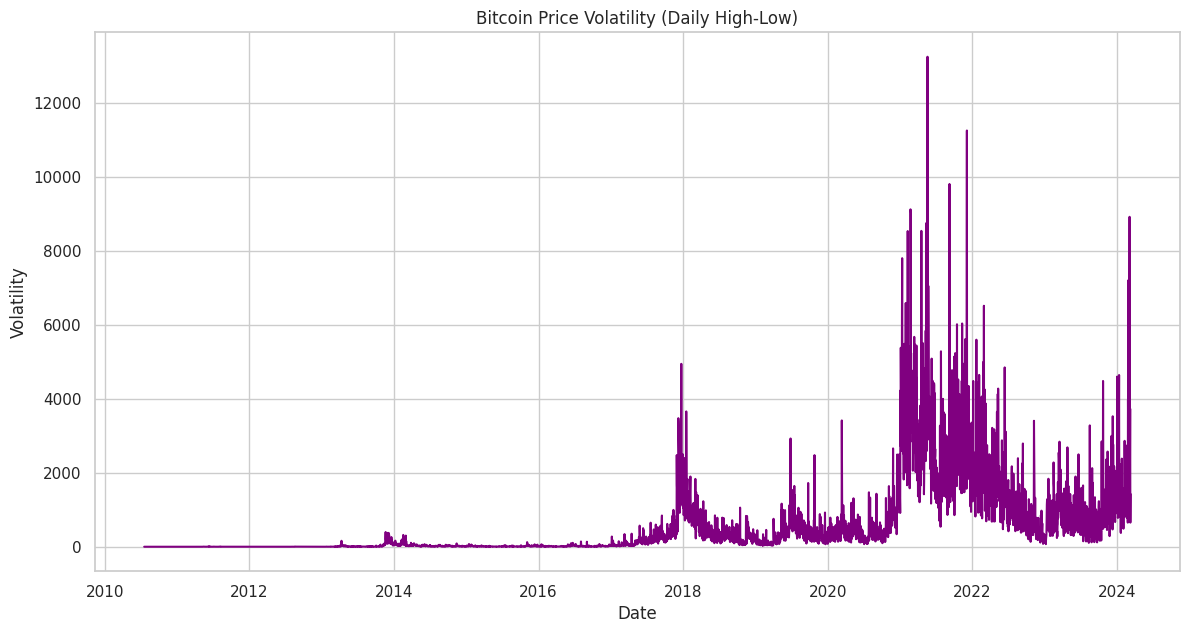

In [92]:
# Recalculate daily volatility
df['Volatility'] = df['High'] - df['Low']

# Plotting the volatility over time again
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Volatility'], color='purple')
plt.title('Bitcoin Price Volatility (Daily High-Low)')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.show()

In [93]:
# Recalculate the correlation between 'Change %' and 'Vol.'
correlation_data = df[['Change %', 'Vol.']].dropna()
correlation = correlation_data.corr()

correlation

,Change %,Vol.
Change %,1.0000,-0.0061
Vol.,-0.0061,1.0000


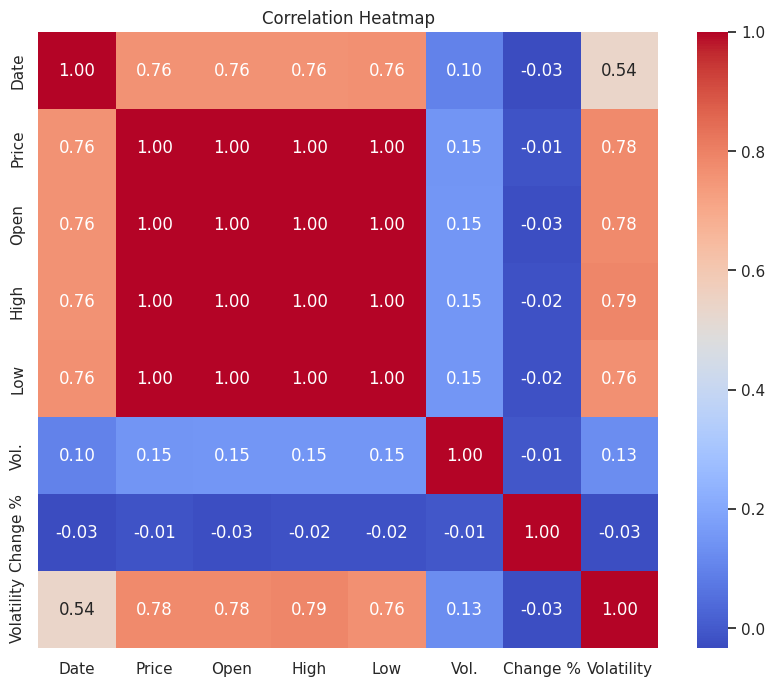

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculating the correlation matrix
corr = df.corr()

# Generating a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()